NOTA: El proyecto aquí presentado es realizado por un grupo de 5 personas y dividido entre ellas, algunos métodos o formas para modificar los datos pueden ser diferentes pero el resultado en dichas transformaciones es el mismo.

#### Librerias utilizadas

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [41]:
archivos = ['datasets_parquet/Cell_Phones_and_Accessories.parquet.gzip','datasets_parquet/Clothing_Shoes_and_Jewelry.parquet.gzip','datasets_parquet/Musical_Instruments.parquet.gzip','datasets_parquet/Pet_Supplies.parquet.gzip']

In [59]:
metadatas = ['metadata_parquet/meta_Cell_Phones_and_Accessories.parquet.gzip','metadata_parquet/meta_Clothing_Shoes_and_Jewelry.parquet.gzip','metadata_parquet/meta_Musical_Instruments.parquet.gzip','metadata_parquet/meta_Pet_Supplies.parquet.gzip']

# Registros duplicados

## Reviews

In [42]:
dataframes = []
for dataset in archivos:
    df = pd.read_parquet(dataset)
    dataframes.append(df)

In [43]:
concatenated_dfs = pd.concat(dataframes)

In [53]:
concatenated_dfs[concatenated_dfs.duplicated(subset=['reviewerID','reviewText','unixReviewTime'])]

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime
8565,a36al809oxaz1b,B0006I3W1K,"arm ""music expert""",comfort and beauty sometimes don't go together...,5,best of the best,1400716800
68433,a3h36a0ewlkjej,B001LNCAPS,"j. burton ""jb""",nice shirt,4,four stars,1404172800
80019,aiif5a8tv0xib,B002BZZUUM,mercedes c,"i've been organizing my self, and they are rea...",5,good,1331769600
84351,a1l08o60mxpcya,B002KE5E32,"walter monserratte ""waltermon""","great shoes. good construction, excellent anti...",5,great shoes,1358467200
86558,aw46uxkjafa5t,B002NY1OJW,ka,first off i have to say i love these shoes wit...,5,best shoes ever! read this to learn how to el...,1390608000
...,...,...,...,...,...,...,...
192524,a22e1xrkaq2zpp,B00JBJ3HTW,kenyon,i have had many different smartwatches and the...,5,best smartwatch ever!!!!,1405900800
192525,a3u41zl33ss92p,B00JBJ3HTW,"kevin nicholls ""jaded, aging hipster""",i've been interested in horology since i was a...,4,look at me! i'm dick tracy!,1397606400
192527,a39gjjt0h2bzh9,B00JBJ3HTW,mike,"just received my gear 2 neo in mocha grey, and...",4,"functional, but rough around the edges",1397088000
192528,a27gittn6avw5i,B00JBJ3HTW,"morimoto ""morimoto""",i've worn both the gear fit and gear 2 neo sep...,2,"wait for this market segment to mature, fitnes...",1398816000


In [57]:
concatenated_dfs[concatenated_dfs.duplicated(keep='first')].sort_values('unixReviewTime')

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime
13199,a1z54em24y40ll,B0007YXUS8,csm,i just love this bra. i was first introduced ...,5,absolutely my favorite!,1090022400
2017,a2k3j2x8kdy47n,B0000B35EL,"jewelry lover ""me""",for $10 these were too good to pass up. first...,2,quality is slipping,1095984000
2074,ab2yza2hly75h,B0000B35GE,reb,"beautiful, shiny, sturdy and well constructed,...",5,lovely,1096416000
1963,ab2yza2hly75h,B0000B35D9,reb,"i purchased these for a teenage cousin, and th...",5,agree with momof2,1096416000
2034,aappwnp9fwvws,B0000B35EM,"kathlyn storey ""kathlyn a storey""","these earrings just arrived, and for $10 (frid...",5,terrific value for gold earrings,1102464000
...,...,...,...,...,...,...,...
245248,a38vcivae3oxd3,B00B2HWCM4,j,this is for winter... it is very warm. but m...,5,beautiful,1405987200
265103,a3uj0ohvuyah1s,B00DQYNS3I,karineh,i will be buying more .... so many colors to c...,5,o m g ! !,1405987200
274947,a1n9kyvo2ihbz1,B00G00MOM6,"l. pollara ""shore guy""",i bought this skirt in black and was so thrill...,5,another,1406073600
275045,a2kgi8dk90ang2,B00G2T8YAQ,judi from chicago,"these are adorable, very inexpensive gifts. ta...",5,great value/cute watches,1406073600


## Metadata

In [60]:
metadata_dfs = []
for metadata in metadatas:
    df = pd.read_parquet(metadata)
    metadata_dfs.append(df)

In [62]:
concatenated_metadfs = pd.concat(metadata_dfs)

In [71]:
concatenated_metadfs[concatenated_metadfs.duplicated(subset=['asin'])]

,description,title,brand,rank,main_cat,price,asin,salesRank
1848,[Whether you travel the globe or just around t...,PalmOne V Leather Belt Clip Case,Palm,"[>#3,057,757 in Cell Phones & Accessories (See...",All Electronics,2.59,B00000J3Q2,NaN
1849,[],PalmOne III Deluxe Leather Case,Palm,"[>#4,146,771 in Cell Phones & Accessories (See...",All Electronics,NaN,B00000J438,NaN
1850,[You'll get plenty of power from our handy ada...,PalmOne Modem AC Adapter,Palm,"[>#7,117,198 in Cell Phones & Accessories (See...",All Electronics,NaN,B00000JHVQ,NaN
1851,"[, Specifically designed for iWatch Smart Watc...",2 Pack Apple 38mm Watch Screen Protector (38mm...,Live2Pedal,[>#122 in Cell Phones & Accessories (See Top 1...,Cell Phones & Accessories,8.99,B00001O39C,NaN
1852,[The EarHugger cellular headset features a sof...,EarHugger C9000 Cellular Headset with Boom Mic...,Ear Hugger,"[>#7,517,303 in Cell Phones & Accessories (See...",Cell Phones & Accessories,NaN,B00001OPI3,NaN
...,...,...,...,...,...,...,...,...
117454,[This Wonder Woman costume for dogs includes a...,DC Comics,Rubie's,[],Pet Supplies,19.99,B00GIBVBK8,NaN
123563,[<b>PRODUCT DETAILS:</b><br> - All natural org...,Buddy&amp;Max Probiotic Chews for Dogs - Diges...,Buddy&Max,[],Pet Supplies,27.85,B00I8V3BQ8,NaN
124864,[<b>PRODUCT DETAILS:</b><br> - All natural org...,Buddy&amp;Max Probiotic Chews for Dogs - Diges...,Buddy&Max,[],Pet Supplies,27.85,B00IKN12T2,NaN
125656,[Justin Mens Silver Cattleman Blue/Gray Boots ...,Justin Mens Silver Cattleman Blu/Gry Boots 6.5D,Justin,[],Pet Supplies,NaN,B00IT5JG62,NaN


# Nulos

## Reviews

In [73]:
concatenated_dfs.isna().sum()

reviewerID        0
asin              0
reviewerName      0
reviewText        0
overall           0
summary           0
unixReviewTime    0
dtype: int64

## Metadata

In [74]:
concatenated_metadfs.isna().sum()

description    1417942
title              688
brand          1405252
rank           1503384
main_cat       1503384
price          1564564
asin                 0
salesRank       997491
dtype: int64

Si bien hay varios nulos en distintas columnas, las dejaremos y seran dropeadas en caso de ser necesario mas adelante

# Distribucion de datos

# Reviews

In [97]:
concatenated_dfs['year'] = concatenated_dfs['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).year)
concatenated_dfs['month'] = concatenated_dfs['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).month)

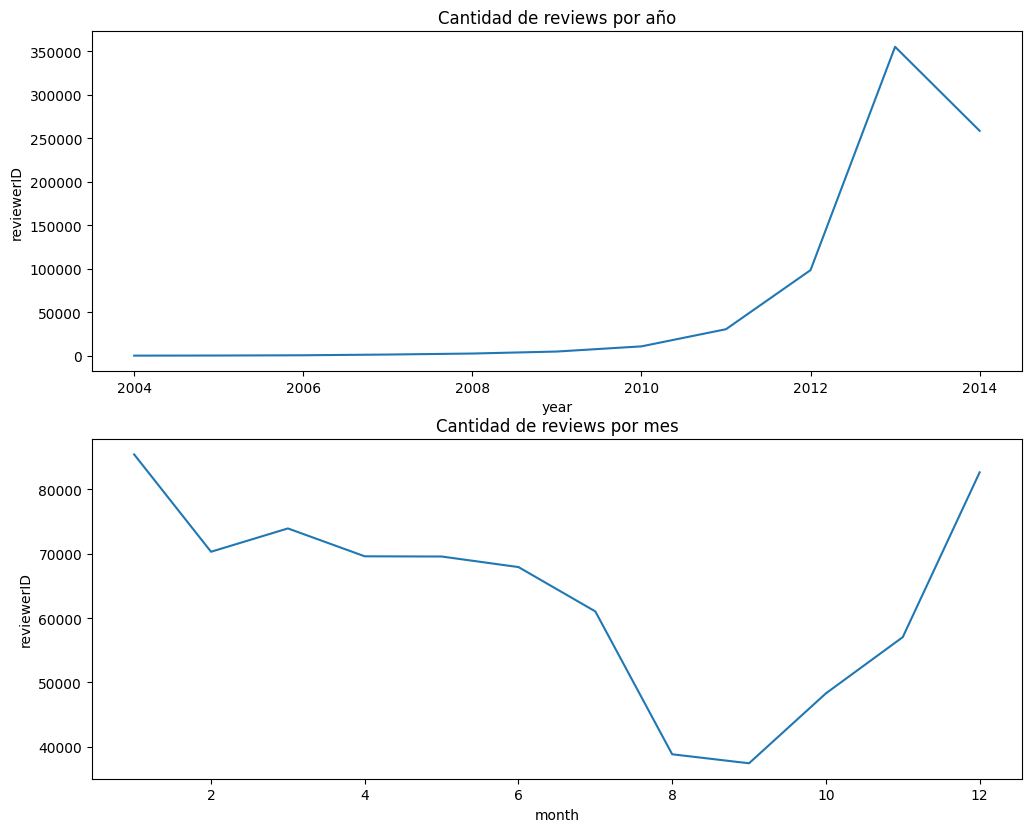

In [121]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt.title('Cantidad de reviews por año')
sns.lineplot(data=concatenated_dfs.groupby('year').count(),
             x='year',
             y='reviewerID')

plt.subplot(3,1,2)
plt.title('Cantidad de reviews por mes')
sns.lineplot(data=concatenated_dfs.groupby('month').count(),
             x='month',
             y='reviewerID'
)

plt.show()

### Promedio de calificaciones

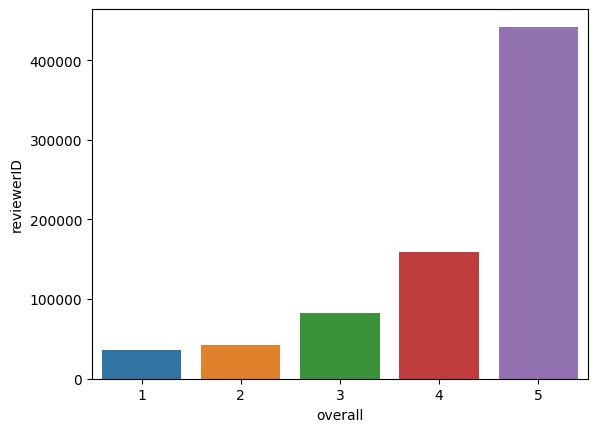

In [115]:
sns.barplot(
    data=concatenated_dfs.groupby('overall').count().reset_index(),
    x='overall',
    y='reviewerID'
)
plt.show()

### Promedio de reviews por usuario

In [120]:
concatenated_dfs.groupby('reviewerID').count()['asin'].mean()

11.553503744807301

# Metadata

## Categorias con mas productos

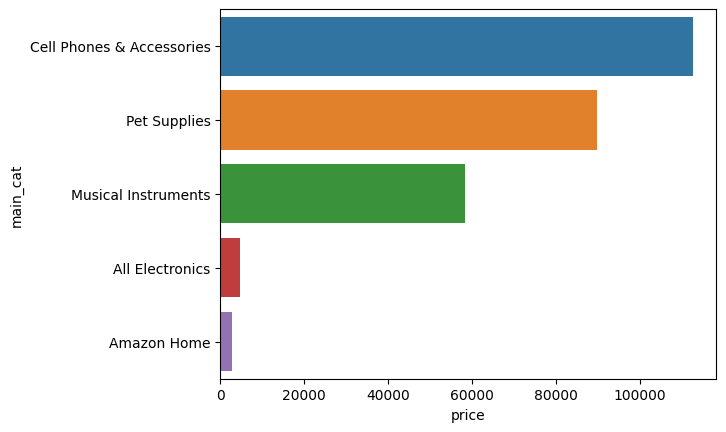

In [172]:
sns.barplot(data = concatenated_metadfs.groupby('main_cat').count().sort_values('price',ascending=False).head().reset_index(),
            x='price',
            y='main_cat')
plt.show()

## Distribucion de precios

In [131]:
# Cantidad de nulos en price
concatenated_metadfs['price'].isna().sum()

1564564

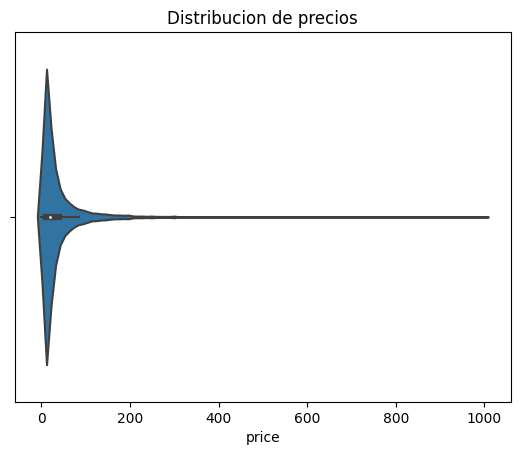

In [154]:
plt.title('Distribucion de precios')
sns.violinplot(
    data=concatenated_metadfs,
    x='price'
)
plt.show()

## Precio promedio por en categorias con mas productos

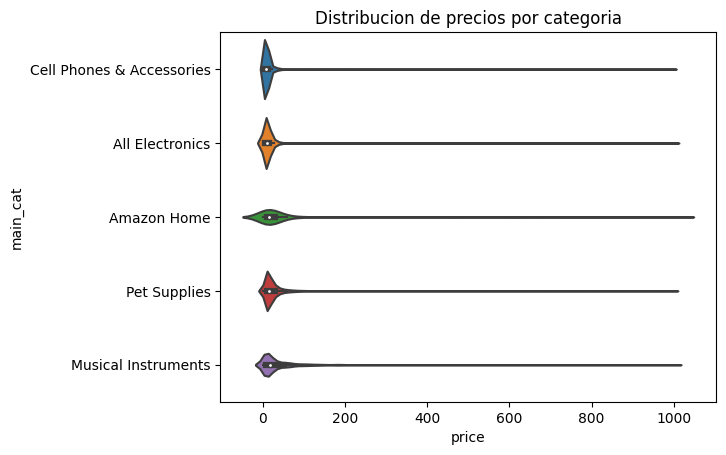

In [184]:
principales_cats = list(concatenated_metadfs.groupby('main_cat').count().sort_values('price',ascending=False).head().index)

plt.title('Distribucion de precios por categoria')
sns.violinplot(
    data=concatenated_metadfs[concatenated_metadfs['main_cat'].isin(principales_cats)],
    x='price',
    y='main_cat'
)
plt.show()

## Marcas mas vendidas por categoria

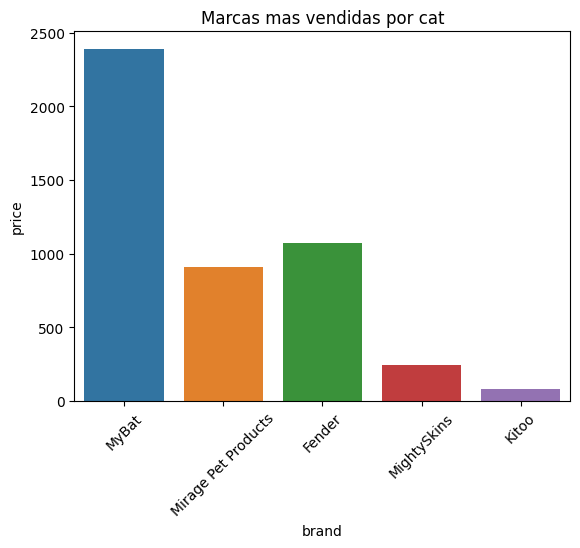

In [201]:
marcas = []
for categoria in principales_cats:
    marcas.append(concatenated_metadfs[concatenated_metadfs['main_cat']==categoria].groupby('brand').count().sort_values('price',ascending=False).head(1))
    
plt.title('Marcas mas vendidas por cat')
sns.barplot(
    data=pd.concat(marcas).reset_index(),
    x='brand',
    y='price'
    
)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()